<a href="https://colab.research.google.com/github/YounSooKimTech/Greg_Python/blob/main/Lab3_dummy_codding_N_multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings

warnings.filterwarnings("ignore")

from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt

# Descriptive Statistics

**Bold Mean**

*Italicize the median*

- list 1
- list 2


# Review

- Text entry
- .sort_index()
- plt.show()
- np.select()

In [2]:
# Exercise

"""
1. using np.select, change the score as letter grade
2. make it as a dataframe (column name is score) pd.DataFrame
3. use value_counts() to see the data
4. use sns.countplot() to visualize the data

"""

import numpy as np
import seaborn as sns
import pandas as pd

np.random.seed(613)

a_list = np.random.randint(50, 100, 20)
print(a_list)


[84 74 66 61 76 98 96 88 97 56 71 99 64 93 73 75 92 62 94 66]


# Dummy variable regression

dataset from https://www.kaggle.com/datasets/hjmjerry/gender-discrimination


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Greg_Python/main/Data/salary_need_coding")
df.head()

,Unnamed: 0,Gender,Exper,Rank,Salary
0,0,Male,9,Full_Professor,77836
1,1,Male,10,Associate,69994
2,2,Male,6,Assistant,62872
3,3,Male,27,Full_Professor,155196
4,4,Male,10,Full_Professor,89268


In [4]:
# how to drop a column

df = df.drop(["Unnamed: 0"], axis=1)

In [5]:
df["Salary"] = df["Salary"]/1000
df

,Gender,Exper,Rank,Salary
0,Male,9,Full_Professor,77.836
1,Male,10,Associate,69.994
2,Male,6,Assistant,62.872
3,Male,27,Full_Professor,155.196
4,Male,10,Full_Professor,89.268
...,...,...,...,...
256,Female,8,Associate,297.174
257,Female,9,Full_Professor,308.081
258,Female,8,Assistant,211.269
259,Female,2,Assistant,210.801


In [6]:
# dummy variable coding 1. mapping

df["D_Rank"] = df["Rank"].map({"Assistant":1, "Associate":2, "Full_Professor":3})
df.head()

,Gender,Exper,Rank,Salary,D_Rank
0,Male,9,Full_Professor,77.836,3
1,Male,10,Associate,69.994,2
2,Male,6,Assistant,62.872,1
3,Male,27,Full_Professor,155.196,3
4,Male,10,Full_Professor,89.268,3


In [7]:
# pd.get_dummies (one-hot-encoding)

df_1 = pd.get_dummies(data=df, columns=["Rank"])
df_1

,Gender,Exper,Salary,D_Rank,Rank_Assistant,Rank_Associate,Rank_Full_Professor
0,Male,9,77.836,3,0,0,1
1,Male,10,69.994,2,0,1,0
2,Male,6,62.872,1,1,0,0
3,Male,27,155.196,3,0,0,1
4,Male,10,89.268,3,0,0,1
...,...,...,...,...,...,...,...
256,Female,8,297.174,2,0,1,0
257,Female,9,308.081,3,0,0,1
258,Female,8,211.269,1,1,0,0
259,Female,2,210.801,1,1,0,0


In [8]:
# Exercise
# get dummy varaible for gender
# 0 = male, 1 = femlae










In [9]:
df.head()

,Gender,Exper,Rank,Salary,D_Rank
0,Male,9,Full_Professor,77.836,3
1,Male,10,Associate,69.994,2
2,Male,6,Assistant,62.872,1
3,Male,27,Full_Professor,155.196,3
4,Male,10,Full_Professor,89.268,3


In [10]:
# simple linear regression

model = smf.ols(formula="Salary~Exper", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     29.51
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           1.28e-07
Time:                        14:33:42   Log-Likelihood:                -1501.0
No. Observations:                 261   AIC:                             3006.
Df Residuals:                     259   BIC:                             3013.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    111.3171      9.107     12.224      0.0

In [11]:
model = smf.ols(formula="Salary~D_Rank", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     14.59
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           0.000167
Time:                        14:33:42   Log-Likelihood:                -1507.9
No. Observations:                 261   AIC:                             3020.
Df Residuals:                     259   BIC:                             3027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    112.8168     11.728      9.619      0.0

In [12]:
model = smf.ols(formula="Salary~Exper + D_Rank", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     14.85
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           7.86e-07
Time:                        14:33:42   Log-Likelihood:                -1500.9
No. Observations:                 261   AIC:                             3008.
Df Residuals:                     258   BIC:                             3018.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.6204     11.519      9.343      0.0

In [14]:
model2 = smf.ols(formula="Salary~Exper+Rank_Assistant+Rank_Associate+Rank_Full_Professor", data=df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     10.15
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           2.43e-06
Time:                        14:33:42   Log-Likelihood:                -1500.5
No. Observations:                 261   AIC:                             3009.
Df Residuals:                     257   BIC:                             3023.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              85.5469    

In [ ]:
# Excersie

# Make a regression with experience and gender











# Lab3 Example with GSS dataset

In [21]:
g = pd.read_csv("https://raw.githubusercontent.com/YounSooKimTech/Greg_Python/main/Data/GSS.2006.csv")
g.head()

,vpsu,vstrat,adults,ballot,dateintv,famgen,form,formwt,gender1,hompop,...,away7,gender14,old14,relate14,relhh14,relhhd14,relsp14,where12,where6,where7
0,1,1957,1,3,316,2,1,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1957,2,2,630,1,2,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1957,2,2,314,2,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1957,1,1,313,1,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1957,3,1,322,2,2,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


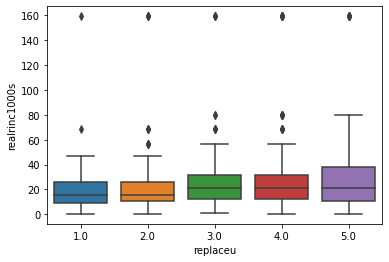

In [22]:
g['realrinc1000s'] = (g['realrinc'])/1000 ## turn income into 1000s of dollars for ease of interpretation

 ##  replaceu asked "How difficult or easy do you think it would be for your firm or organization 
## to replace you if you left?" with 1 being easily and 5 being very difficultly.


## Look at the plot of average income by how hard it would be to replace you.    
import seaborn as sns
sns.boxplot(x="replaceu", y="realrinc1000s",
                        data=g)

In [23]:
gg = g.dropna(subset = ["big5d2"]) ## We only include observations that also answer about their personality ##
    
lm_rep = smf.ols(formula = 'replaceu~realrinc1000s', data = gg).fit()
print (lm_rep.summary())

#For every 1000 dollars more, a person believes it is 0.008 points harder to find someone to replace them, on average

                            OLS Regression Results                            
Dep. Variable:               replaceu   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     27.41
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           2.09e-07
Time:                        14:38:32   Log-Likelihood:                -1412.7
No. Observations:                 835   AIC:                             2829.
Df Residuals:                     833   BIC:                             2839.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.6798      0.061     43.732

In [24]:
lm_med = smf.ols(formula = 'replaceu~realrinc1000s+big5d2', data = gg).fit()
print (lm_med.summary())

# 1027) I see myself as someone who gets nervous easily. (BIG5D2)

# Net of how much money someone makes, for each category more confident they feel, they are .13 points higher on thinking they cannot be easily replaced
# But you will see that this second variable hardly changes the income variable, so it is not mediating the effect really

                            OLS Regression Results                            
Dep. Variable:               replaceu   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     18.93
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           9.14e-09
Time:                        14:39:14   Log-Likelihood:                -1407.7
No. Observations:                 835   AIC:                             2821.
Df Residuals:                     832   BIC:                             2835.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.2214      0.156     14.211

# answers

[84 74 66 61 76 98 96 88 97 56 71 99 64 93 73 75 92 62 94 66]


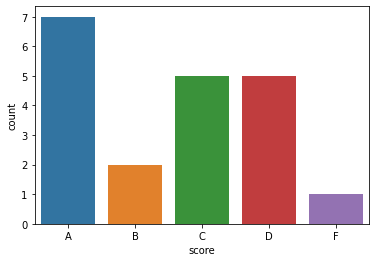

In [18]:
# answer for review exercise


import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(613)

a_list = np.random.randint(50, 100, 20)
print(a_list)

conditions = [(a_list>=90), (a_list>=80), (a_list>=70), (a_list>=60), (a_list>=50)]
choices = ["A", "B", "C", "D", "F"]

b_list = np.select(conditions, choices, a_list)
b_list = pd.DataFrame({"score":b_list})
b_list

b_list["score"].value_counts()

b_list["score"].value_counts().sort_index()

sns.countplot(b_list["score"], order = ["A", "B", "C", "D", "F"])
plt.show()

In [15]:


df = pd.get_dummies(data=df, columns = ["Gender"])
df.head()


,Exper,Salary,D_Rank,Rank_Assistant,Rank_Associate,Rank_Full_Professor,Gender_Female,Gender_Male
0,9,77.836,3,0,0,1,0,1
1,10,69.994,2,0,1,0,0,1
2,6,62.872,1,1,0,0,0,1
3,27,155.196,3,0,0,1,0,1
4,10,89.268,3,0,0,1,0,1


In [16]:

model3 = smf.ols(formula="Salary~Exper+Gender_Female+Gender_Male", data=df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     26.28
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           4.10e-11
Time:                        14:33:42   Log-Likelihood:                -1490.9
No. Observations:                 261   AIC:                             2988.
Df Residuals:                     258   BIC:                             2998.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        80.2931      6.002     13.378